In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime,timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
errors = np.random.normal(0,1,1000)

In [10]:
mu = 50
date = pd.date_range("2019-09-01","2020-01-01")
series = []
for t in range(2,len(date)):
    series.append(mu+errors[t-1]*0.4+errors[t-2]*0.3+errors[t])
series = pd.Series(data=series,index=date[2:])

In [11]:
series

2019-09-03    50.811308
2019-09-04    48.997677
2019-09-05    49.615553
2019-09-06    49.893706
2019-09-07    48.278008
                ...    
2019-12-28    48.834891
2019-12-29    50.566191
2019-12-30    49.776631
2019-12-31    50.396555
2020-01-01    49.698307
Freq: D, Length: 121, dtype: float64

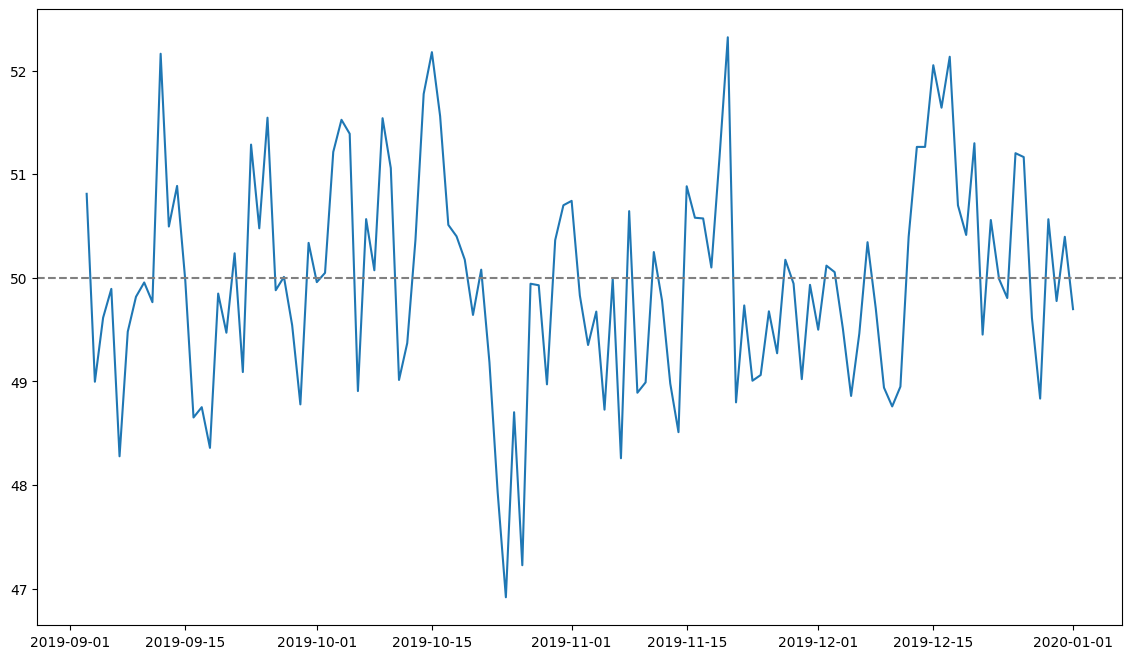

In [13]:
plt.figure(figsize=(14,8))
plt.plot(series)
plt.axhline(mu,linestyle='--',color='gray')
plt.show()

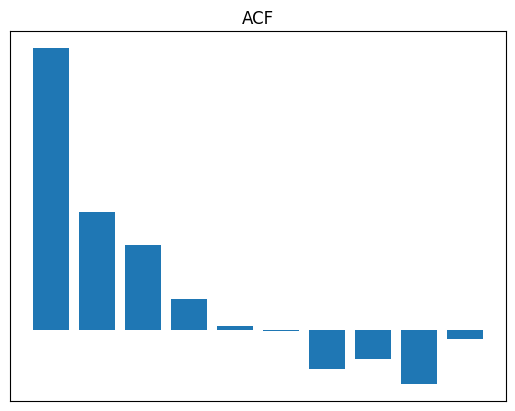

In [21]:
acf_data = acf(series)
plt.title("ACF")
plt.bar(range(10),height=acf_data[:10])
plt.xticks([])
plt.yticks([])
plt.show()

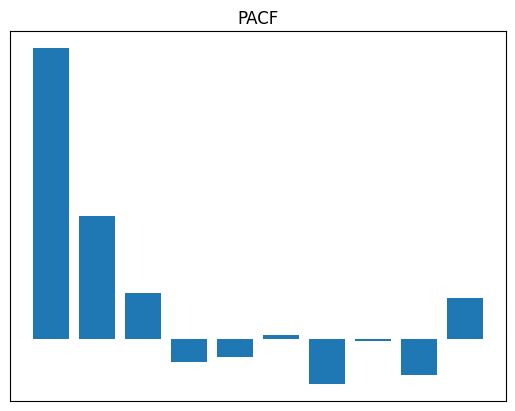

In [22]:
pacf_data = pacf(series)
plt.title("PACF")
plt.bar(range(10),pacf_data[:10])
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)
train_data = series[:train_end]
test_data = series[train_end+timedelta(days=1):test_end]

In [27]:
model = ARIMA(train_data,order=(0,0,2))
model_fitted = model.fit()

In [29]:
print(model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -159.709
Date:                Thu, 25 Apr 2024   AIC                            327.418
Time:                        09:37:01   BIC                            338.534
Sample:                    09-03-2019   HQIC                           331.932
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9789      0.139    359.513      0.000      49.706      50.251
ma.L1          0.3425      0.091      3.764      0.000       0.164       0.521
ma.L2          0.2857      0.094      3.044      0.0

In [31]:
pred_start_date = test_data.index[0]
pred_end_date= test_data.index[1]

In [32]:
pred_start_date

Timestamp('2019-12-31 00:00:00')

In [33]:
pred_end_date

Timestamp('2020-01-01 00:00:00')

In [34]:
prediction = model_fitted.predict(start=pred_start_date,end=pred_end_date)

In [35]:
residuals = test_data - prediction

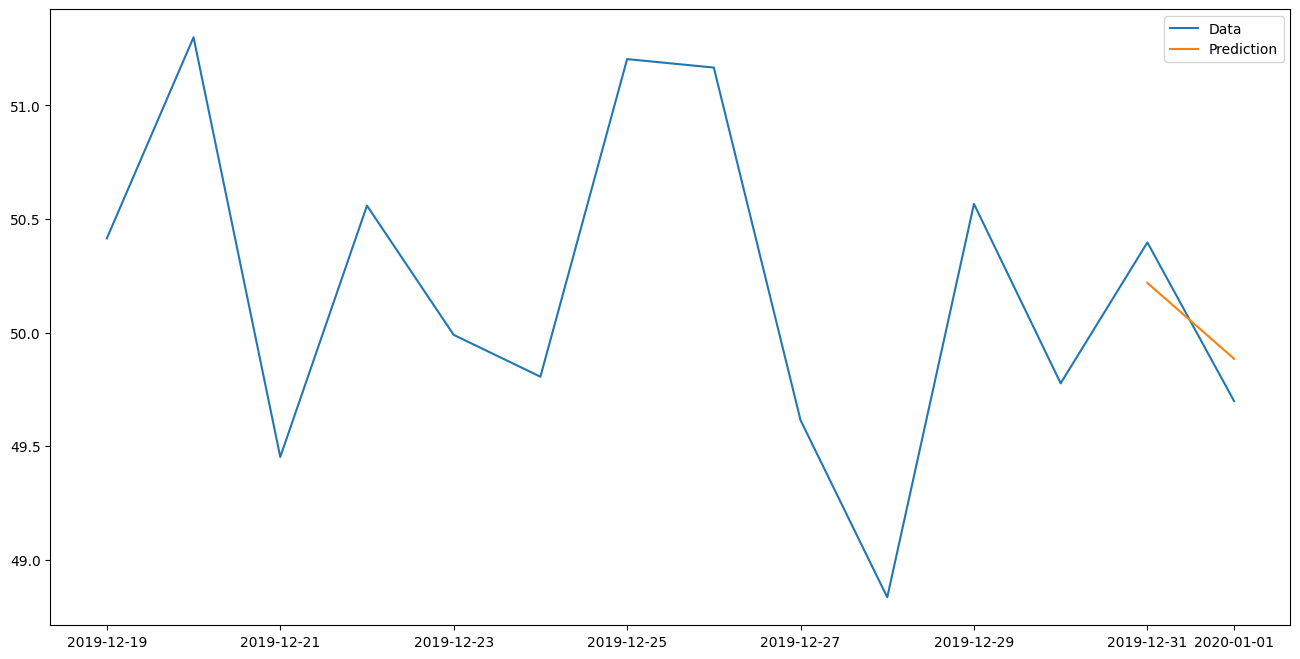

In [40]:
plt.figure(figsize=(16,8))
plt.plot(series[-14:])
plt.plot(prediction)
plt.legend(["Data","Prediction"])
plt.show()

In [43]:
print(f"Mean Absolute Error: {round(np.mean(abs(residuals/test_data)),4)}")

Mean Absolute Error: 0.0036


In [48]:
print(f"Root Mean Squared Error: {np.sqrt(np.mean(residuals**2))}")

Root Mean Squared Error: 0.18224143690217373
